# Entrega 1 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Se puede descargar el dataset directamente de kaggle **kaggle datasets download -d dansbecker/nba-shot-logs**

#cargamos el dataset
fulldata = pd.read_csv('shot_logs.csv')

#renombramos la columna, en la mayoria de los casos simplemente ponemos nombres en minuscula pero a otras
#hacemos los nombres mas descriptivos

renamed_columns = {'GAME_ID' : 'game_id', 'MATCHUP': 'matchup', 'LOCATION' : 'location', 'W' : 'game_result', 
                   'FINAL_MARGIN' : 'final_margin', 'SHOT_NUMBER': 'shot_number', 'PERIOD' : 'period', 
                   'GAME_CLOCK' : 'game_clock', 'SHOT_CLOCK' : 'shot_clock', 'DRIBBLES' : 'dribbles', 
                   'TOUCH_TIME' : 'touch_time', 'SHOT_DIST' : 'shot_dist', 'PTS_TYPE' : 'pts_type', 'SHOT_RESULT' : 'shot_result',
                   'CLOSEST_DEFENDER' : 'closet_defender', 'CLOSEST_DEFENDER_PLAYER_ID' : 'closet_defender_id', 
                  'CLOSE_DEF_DIST' : 'closet_defender_dist', 'FGM' : 'shot_result_id', 'PTS' : 'pts'}
fulldata.rename(columns=renamed_columns, inplace=True)

## Variables

Nombre | Tipo | Definicion | Ejemplo | Uso de la variable
:--|:--|:--|:--|:--
game_id  | int64 | Id del partido |  21400899 | Entrada
matchup  | str | Fecha y equipos |  MAR 04,  2015 - CHA @ BKN | Entrada
location  | str | Indica si el equipo es local o visitante |  A | Entrada
game_result  | str | Indica si el equipo ganó o no |  W | Entrada
final_margin  | int64 | Diferencia del resultado final |  24 | Entrada
shot_number  | int64 | Indica el número del tiro tomado por el jugador en el partido |  1 | Entrada
period  | int64 | Diferencia los cuartos del partido |  1 | Entrada
game_clock  | str | Tiempo de juego total en el que el jugador lanzó |  1:09 | Entrada
shot_clock  | float64 | Tiempo de posesión en el cual el jugador lanzó |  10.8 | Entrada
dribbles  | int64 | Cantidad de dirbbles del jugador antes de tomar el tiro |  2 | Entada
touch_time  | float64 | Tiempo que tuvo la pelota antes de lanzar |  1.9 | Entrada
shot_dist  | float64 | Distancia de tiro respecto al aro |  7.7 | Entrada
pts_type  | int64 | Valor del tiro |  2 | No se usa
shot_result  | str | Indica si convirtió o no |  made | Salida
closet_defender  | str | Nombre del jugador oponente más cercano que lo estaba defendiendo |  Anderson,  Alan | No se usa
closet_defender_id  | int64 | Id del jugador oponente más cercano que lo estaba defendiendo |  101187 | Entrada
closet_defender_dist  | float64 | Distancia a la que estaba el oponente más cercano que lo defendía |  1.3 | Entrada
shot_result_id  | int64 | Indica si convirtió o no |  1 | Salida
pts  | int64 | Puntos reales del tiro |  2 | Entrada
player_name  | str | Nombre del jugador tirador |  brian roberts | No se usa
player_id  | int64 | Id del jugador tirador |  203148 | Entrada

### Elección de la variable de salida
#### En nuestro caso la variable de salida podría ser shot_result o shot_result_id, ambas variables indican lo mismo pero son de diferente tipo.

* Estas consultas nos permitieron validar que ambas variables indican lo mismo
  * fulldata[(fulldata.shot_result == 'made') & (fulldata.shot_result_id == 1)]
  * fulldata[(fulldata.shot_result == 'missed') & (fulldata.shot_result_id == 0)]


Variable|Salidas
--|--
shot_result_id| 1 = made, 0 = missed
shot_result| made, missed


##### Elegimos **shot_result_id**

### Transformaciones necesarias para las variables
Nombre | Tipo | Hay que transformar? | Justificación
:---|:---|:---|:---
matchup  | str | Si | Debemos separar en tres columnas diferentes la fecha y los equipos (una para el local, otra para el visitante). Además, debemos formatear correctamente la fecha y realizar un one-hot encoder con los equipos.
location  | str | Si | Lo ideal será pasarlo a tipo binario de 0 = local y 1 = visitante. 
shot_number  | int64 | Si | Debemos pasar a tipo float por requerimiento de la librería.   
period  | int64 | Si | Junto a game_clock, se utilizará para pasar el tiempo del partido a segundos, luego de esta transformación se eliminará  
game_clock  | str | Si | Junto a period, se utilizará para pasar el tiempo del partido a segundos, luego de esta transformación se eliminará  
shot_clock  | float64 | No | No necesita modificación ya que el tipo es correcto y la variable está lista para usar.
dribbles  | int64 | Si | Debemos pasar a tipo float por requerimiento de la librería.
touch_time  | float64 | No | No necesita modificación ya que el tipo es correcto y la variable está lista para usar.
shot_dist  | float64 | No | No necesita modificación ya que el tipo es correcto y la variable está lista para usar.
closet_defender_dist  | float64 | No | No necesita modificación ya que el tipo es correcto y la variable está lista para usar.
shot_result_id  | int64 | No | La elección de esta variable por encima de shot_result se debió a que estaba correctamente formateada, si es requerido por la librería solo se debería pasar a float.
closet_defender  | str | Si | Debemos formatear el nombre, ya que están escritos de diferentes maneras y con diferentes símbolos. El formato será el nombre y apellido en minúscula unidos por un _ . Luego de esta transformación se hará one-hot encoder.
player_name  | str | Si | Debemos formatear el nombre, ya que están escritos de diferentes maneras y con diferentes símbolos. El formato será el nombre y apellido en minúscula unidos por un _ . Luego de esta transformación se hará one-hot encoder.
pts_type  | int64 | Si | Debemos pasar a tipo float por requerimiento de la librería.


### Variables que no se van a utilizar
Nombre | Tipo | Justificación
:---|:---|:---
game_id  | int64 | No lo vamos a utilizar ya que no nos parece una variable importante, y en caso de utilizarla podría ayudar al modelo a overfittear.
game_result  | str | No lo vamos a utilizar ya que es data futura.
final_margin  | int64 | No lo vamos a utilizar ya que es data futura.
pts  | int64 | **No lo vamos a utilizar ya que es data futura y en esta contiene el resultado del valor del tiro, por ende, si se lo pasamos a los modelos, le estaríamos pasando el resultado del tiro**
closet_defender_id  | int64 | Vamos a utilizar el nombre del jugador realizando one-hot encoder.
player_id  | int64 | Vamos a utilizar el nombre del jugador realizando one-hot encoder.


### Descripción general de los datos

In [3]:
fulldata.head()

game_id                   matchup location game_result  final_margin  \
0  21400899  MAR 04, 2015 - CHA @ BKN        A           W            24   
1  21400899  MAR 04, 2015 - CHA @ BKN        A           W            24   
2  21400899  MAR 04, 2015 - CHA @ BKN        A           W            24   
3  21400899  MAR 04, 2015 - CHA @ BKN        A           W            24   
4  21400899  MAR 04, 2015 - CHA @ BKN        A           W            24   

   shot_number  period game_clock  shot_clock  dribbles  ...  shot_dist  \
0            1       1       1:09        10.8         2  ...        7.7   
1            2       1       0:14         3.4         0  ...       28.2   
2            3       1       0:00         NaN         3  ...       10.1   
3            4       2      11:47        10.3         2  ...       17.2   
4            5       2      10:34        10.9         2  ...        3.7   

   pts_type  shot_result    closet_defender closet_defender_id  \
0         2         made     Anderson, Alan             101187   
1         3       missed  Bogdanovic, Bojan             202711   
2         2       missed  Bogdanovic, Bojan             202711   
3         2       missed      Brown, Markel             203900   
4         2       missed    Young, Thaddeus             201152   

   closet_defender_dist  shot_result_id  pts    player_name player_id  
0                   1.3               1    2  brian roberts    203148  
1                   6.1               0    0  brian roberts    203148  
2                   0.9               0    0  brian roberts    203148  
3                   3.4               0    0  brian roberts    203148  
4                   1.1               0    0  brian roberts    203148  

[5 rows x 21 columns]

In [4]:
fulldata.describe()

game_id   final_margin    shot_number         period  \
count  1.280690e+05  128069.000000  128069.000000  128069.000000   
mean   2.140045e+07       0.208723       6.506899       2.469427   
std    2.578773e+02      13.233267       4.713260       1.139919   
min    2.140000e+07     -53.000000       1.000000       1.000000   
25%    2.140023e+07      -8.000000       3.000000       1.000000   
50%    2.140045e+07       1.000000       5.000000       2.000000   
75%    2.140067e+07       9.000000       9.000000       3.000000   
max    2.140091e+07      53.000000      38.000000       7.000000   

          shot_clock       dribbles     touch_time      shot_dist  \
count  122502.000000  128069.000000  128069.000000  128069.000000   
mean       12.453344       2.023355       2.765901      13.571504   
std         5.763265       3.477760       3.043682       8.888964   
min         0.000000       0.000000    -163.600000       0.000000   
25%         8.200000       0.000000       0.900000       4.700000   
50%        12.300000       1.000000       1.600000      13.700000   
75%        16.675000       2.000000       3.700000      22.500000   
max        24.000000      32.000000      24.900000      47.200000   

            pts_type  closet_defender_id  closet_defender_dist  \
count  128069.000000       128069.000000         128069.000000   
mean        2.264670       159038.487284              4.123015   
std         0.441159        78791.172947              2.756446   
min         2.000000          708.000000              0.000000   
25%         2.000000       101249.000000              2.300000   
50%         2.000000       201949.000000              3.700000   
75%         3.000000       203079.000000              5.300000   
max         3.000000       530027.000000             53.200000   

       shot_result_id            pts      player_id  
count   128069.000000  128069.000000  128069.000000  
mean         0.452139       0.997314  157238.251247  
std          0.497706       1.130978   79362.389336  
min          0.000000       0.000000     708.000000  
25%          0.000000       0.000000  101162.000000  
50%          0.000000       0.000000  201939.000000  
75%          1.000000       2.000000  202704.000000  
max          1.000000       3.000000  204060.000000

#### Algunas conclusiones preliminares a partir de los datos que se encuentran arriba:
* Podemos ver rápidamente que hay valores faltantes en shot_clock y las otras variables están completas.
* La diferencia final en el resultado de los partidos es correcta ya que el valor debería ser 0 y es muy cerano a este, pero vemos que la diferencia entre el primer y tercer cuartil con respecto al mínimo y al máximo es demasiado elevada.
* Vemos que la cantidad máxima de períodos fue 7 (3 tiempos suplementarios) mientras que lo común es que el partido termine en 4.
* Hay amplia diferencia entre los jugadores con respecto de la cantidad de tiros tomados.
* Puede llegar a ver un error de carga en algún tiempo de tiro durante el partido ya que el mínimo es 0,0 y esto sería imposible, lo mismo ocurre con el touch_time en su mínimo y su máximo.
* Se considerará como 0.00 el touch_time cuando se le permite al equipo realizar un saque y solamente rozar la pelota?
  * Con estas líneas de código se puede observar la cantidad de tiros convertidos y errados en esa situación
    * fulldata[(fulldata.touch_time == 0.00) & (fulldata.shot_result_id == 1)].count()
    * fulldata[(fulldata.touch_time == 0.00) & (fulldata.shot_result_id == 0)].count()
  * Igualmente con este panorama seguimos teniendo 312 valores por debajo de 0 en el touch_time y esto no sería correcto
    * fulldata[(fulldata.touch_time < 0.00)].count()

In [5]:
fulldata.isnull().any()
#Vemos que hay una variable a la que le faltan datos, verificar si es significativo

game_id                 False
matchup                 False
location                False
game_result             False
final_margin            False
shot_number             False
period                  False
game_clock              False
shot_clock               True
dribbles                False
touch_time              False
shot_dist               False
pts_type                False
shot_result             False
closet_defender         False
closet_defender_id      False
closet_defender_dist    False
shot_result_id          False
pts                     False
player_name             False
player_id               False
dtype: bool

In [6]:
#Como shot_clock es el único que tiene nulos calculo el porcentaje de nulos sobre el total (formateando la salida)
print("Total de datos: ", len(fulldata))
print("Cantidad de nulos shot_clock: ", len(fulldata[fulldata.shot_clock.isnull()==True]))
print("Porcentaje de nulos sobre el total: ", "{:.3f}".format(((len(fulldata[fulldata.shot_clock.isnull()==True]))*100)/len(fulldata)), '%')

Total de datos:  128069
Cantidad de nulos shot_clock:  5567
Porcentaje de nulos sobre el total:  4.347 %


Debemos revisar esta variable y como complementar la información faltante ya que en este momento nos parece que va a ser de mucha utilidad.

## Variable de Salida
### Cuál es la proporción de tiros convertidos sobre el total?

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

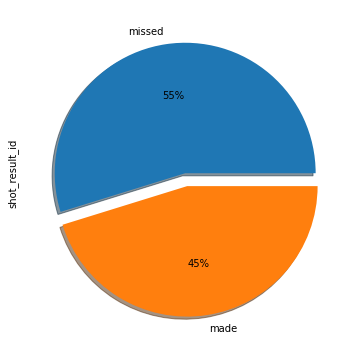

In [8]:
labels = 'missed', 'made'
explode = (0, 0.1)
fulldata.shot_result_id.value_counts().plot.pie(labels=labels, autopct='%1.0f%%', figsize=(6,6), 
                                                shadow=True, explode=explode)

Vemos que los datos de salida se encuentran balanceados, con esto podemos obtener la premisa de que la mayoría erra la mitad de los tiros que ejecuta.

Que el Dataset se encuentre balanceado es de vital importancia para nuestro trabajo, ya que si tendríamos más datos de uno que de otro nuestro modelo no sabrían como interpetar de manera correcta el resultado del tiro.
Además, esto nos va a evitar en gran medida el sobreentrenamiento del modelo.

### Algunas variables de entrada

### Agrupando dependiendo de la localía?

##### location

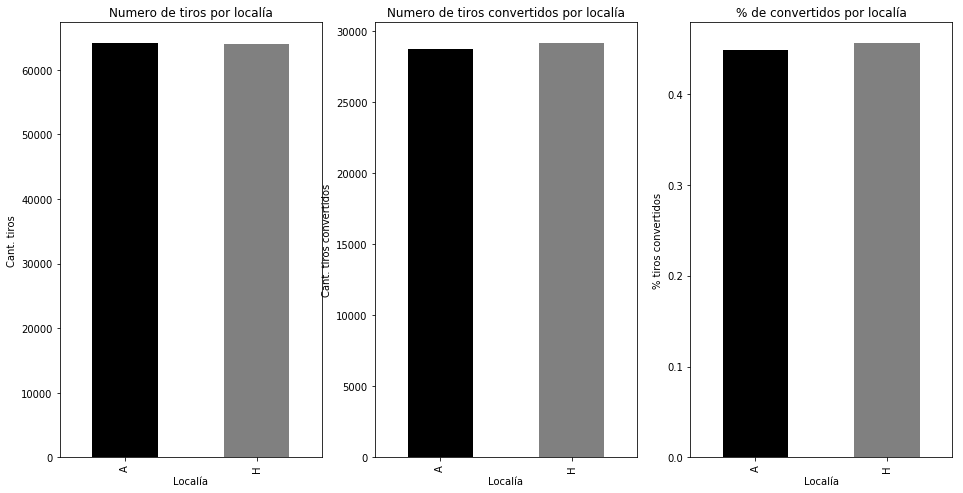

In [9]:
f,ax=plt.subplots(1,3,figsize=(16,8))

ax[0].set_title('Numero de tiros por localía')
ax[0].set_xlabel('Localía')
ax[0].set_ylabel('Cant. tiros')
fulldata.location.value_counts().sort_index().plot.bar(ax=ax[0], color=['black', 'gray'])
ax[1].set_title('Numero de tiros convertidos por localía')
ax[1].set_xlabel('Localía')
ax[1].set_ylabel('Cant. tiros convertidos')
fulldata[(fulldata.shot_result_id == 1)].location.value_counts().sort_index().plot.bar(ax=ax[1], color=['black', 'gray'])
ax[2].set_title('% de convertidos por localía')
ax[2].set_xlabel('Localía')
ax[2].set_ylabel('% tiros convertidos')
(fulldata[(fulldata.shot_result_id == 1)].location.value_counts().sort_index() / fulldata.location.value_counts().sort_index()).plot.bar(ax=ax[2], color=['black', 'gray'])

Vemos que no hay una diferencia marcada y esto se debe a que todos los equipos tienen la misma cantidad de partidos de local que de visitante, por eso es muy cercana la igualdad, ya que la cantidad de tiros tomadas dependen del equipo y no de la cancha donde juegue el mismo.

### Cuánto tendrá que ver la distancia desde donde se toma el tiro?

##### En este caso comparamos triples contra dobles solamente

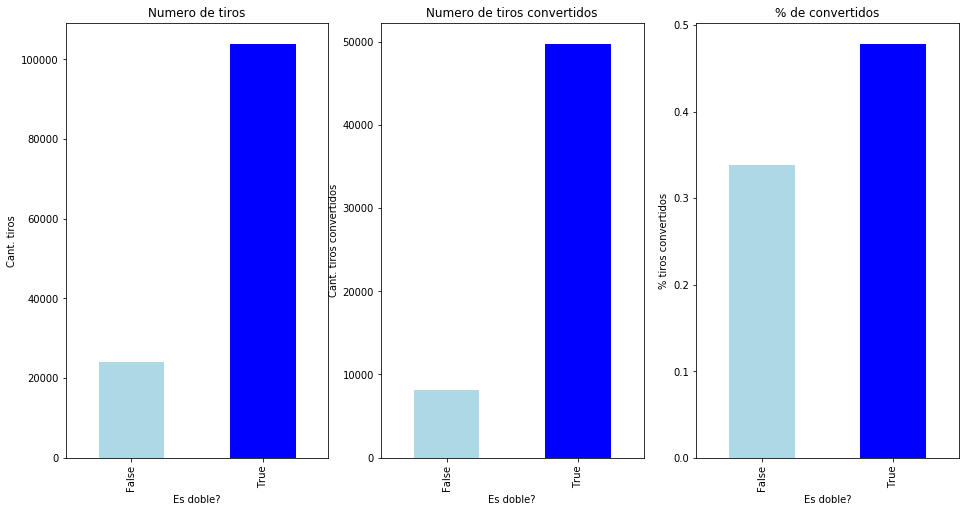

In [10]:
# 1 ft = 0,3048 mts
# 23'9"pies (7,25m) = Triple
fulldata['dobles'] = fulldata.shot_dist < 23.9
f,ax=plt.subplots(1,3,figsize=(16,8))
ax[0].set_title('Numero de tiros')
ax[0].set_xlabel('Es doble?')
ax[0].set_ylabel('Cant. tiros')
fulldata.dobles.value_counts().sort_index().plot.bar(ax=ax[0], color=['lightblue', 'blue'])
ax[1].set_title('Numero de tiros convertidos')
ax[1].set_xlabel('Es doble?')
ax[1].set_ylabel('Cant. tiros convertidos')
fulldata[(fulldata.shot_result_id == 1)].dobles.value_counts().sort_index().plot.bar(ax=ax[1], color=['lightblue', 'blue'])
ax[2].set_title('% de convertidos')
ax[2].set_xlabel('Es doble?')
ax[2].set_ylabel('% tiros convertidos')
(fulldata[(fulldata.shot_result_id == 1)].dobles.value_counts().sort_index() / fulldata.dobles.value_counts().sort_index()).plot.bar(ax=ax[2], color=['lightblue', 'blue'])

Vemos que en una primera instancia, separando entre dobles y triples, la distancia, en general, afecta de gran manera la cantidad de tiros convertidos. Es mucho más sencillo convertir de cerca que de lejos según esta evaluación del dataset.

Para seguir con el tema que venimos viendo, vamos a descomponer en mayor medida la variable **shot_dist**
#### shot_dist

Tiro más lejano:  47.2
Tiro más cercano:  0.0


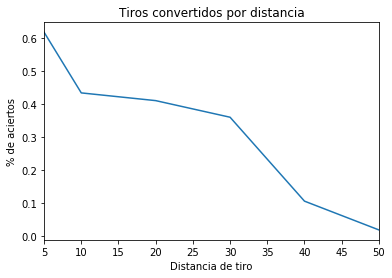

In [11]:
print("Tiro más lejano: ", fulldata[(fulldata.shot_dist).notnull()].max().shot_dist)
print("Tiro más cercano: ", fulldata[(fulldata.shot_dist).notnull()].min().shot_dist)

distancias_tiro = [0,5,10,20,30,40,50]
# Cantidad de tiros convertidos mayores al indice anterior pero menor al actual, dividido la cantidad total
# de tiros entre esos valores

tiro_convertido = [(fulldata[np.logical_and(np.logical_and(fulldata['shot_dist']>distancias_tiro[i-1],fulldata['shot_dist']<distancias_tiro[i])
            , fulldata['shot_result_id']==1)  ].size/fulldata[np.logical_and(fulldata['shot_dist']>distancias_tiro[i-1]
            , fulldata['shot_dist']<distancias_tiro[i] )  ].size) for i in range(1,len(distancias_tiro))]
   
total_tiros_convertidos = pd.Series(tiro_convertido, index =  distancias_tiro[1:len(distancias_tiro)])
total_tiros_convertidos.plot(title = "Tiros convertidos por distancia")
plt.xlabel("Distancia de tiro")
plt.ylabel("% de aciertos")
plt.show()

Es algo obvio, pero que definitivamente debíamos confirmar, mientras más cerca del aro esté el jugador, muchas más chances tiene de acertar.

### Tener un defensor cerca afecta la eficacia del tiro?
##### closet_defender_dist


Defensor más lejano:  53.2
Defensor más cercano:  0.0
+---------------------------------------------------------------------+
| Distancia entre                        Cantidad                     |
|  Min       Max     Total tiros   Convertidos   Errados   Eficacia % |
|---------------------------------------------------------------------|
| 0          4.9          90388        41329       49059        45.72 |
| 5          9.9          33218        14444       18774        43.48 |
| 10         14.9          3467         1597        1870        46.06 |
| 15         19.9           814          403         411        49.51 |
| 20         24.9           116           68          48        58.62 |
| 25         29.9            22           20           2        90.91 |
| 30         34.9            16           16           0        100.0 |
| 35         39.9             8            8           0        100.0 |
| 40         44.9             7            7           0        100.0 |
| 45      

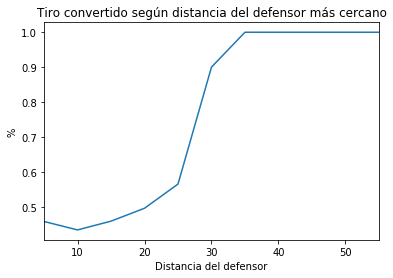

In [12]:
print("Defensor más lejano: ", fulldata[(fulldata.closet_defender_dist).notnull()].max().closet_defender_dist)
print("Defensor más cercano: ", fulldata[(fulldata.closet_defender_dist).notnull()].min().closet_defender_dist)

distancia_defensor = [0,5,10,15,20,25,30,35,40,45,50,55]

# Recorro la informacion y dibujo tabla
lista_con_info_total = []
lista_info_parcial = []
for i in distancia_defensor[1:]:
    dist_min = i-5
    dist_max = i-0.1
    cant_tiros_dist_def = fulldata[(fulldata.closet_defender_dist >= i-5) 
             & (fulldata.closet_defender_dist < i)].count().closet_defender_dist
    cant_tiros_conv_dist_def = fulldata[(fulldata.closet_defender_dist >= i-5) 
             & (fulldata.closet_defender_dist < i) & (fulldata.shot_result_id == 1)].count().closet_defender_dist
    cant_tiros_err_dist_def = fulldata[(fulldata.closet_defender_dist >= i-5) 
             & (fulldata.closet_defender_dist < i) & (fulldata.shot_result_id == 0)].count().closet_defender_dist
    conv_porcent = round((cant_tiros_conv_dist_def * 100)/cant_tiros_dist_def,2)
    lista_info_parcial = [dist_min, dist_max, cant_tiros_dist_def, cant_tiros_conv_dist_def, cant_tiros_err_dist_def, conv_porcent]
    lista_con_info_total.append(lista_info_parcial)

tabla_formato = """\
+---------------------------------------------------------------------+
| Distancia entre                        Cantidad                     |
|  Min       Max     Total tiros   Convertidos   Errados   Eficacia % |
|---------------------------------------------------------------------|
{}
+---------------------------------------------------------------------+\
"""
tabla_formato = (tabla_formato.format('\n'.join("| {:<10} {:<9} {:>8} {:>12} {:>11} {:>12} |".format(*registro)
 for registro in lista_con_info_total)))
print (tabla_formato)

# Recorro la misma info y hago grafico

shot_made = [(fulldata[np.logical_and(np.logical_and(fulldata['closet_defender_dist']>distancia_defensor[i-1],
            fulldata['closet_defender_dist']<distancia_defensor[i] ), 
            fulldata['shot_result_id']==1)  ].size/fulldata[np.logical_and(fulldata['closet_defender_dist']>distancia_defensor[i-1],
            fulldata['closet_defender_dist']<distancia_defensor[i] )  ].size)  for i in range(1,len(distancia_defensor))]

lambda_results = pd.Series(shot_made, index = distancia_defensor[1:len(distancia_defensor)])
lambda_results.plot(title = "Tiro convertido según distancia del defensor más cercano")
plt.xlabel("Distancia del defensor")
plt.ylabel("%")
plt.show()

Se puede apreciar que a mayor distancia del defensor, más facilidad para el tirador convertir. 
Esto puede deberse a que en las mayores distancias con el defensor más cerca estaba el tirador del aro (contra ataque).
Para validar esto **sería muy útil comparar la distancia del defensor con la distancia de tiro.**

Tratamos de validar esto, para eso hacemos el promedio de la distancia de tiros que se realizaron entre esas distancias de defensor.

In [13]:
# Busca los tiros realizados entre esas distancias de defensores y realiza un promedio de la posición de tiro
"""
# IMPORTANTE!! esta consulta demoraba cerca de 2 min, pero con np mejoró una barbaridad
tiro=[]
tiros=[]
for i in distancia_defensor[1:]:
    dist_tiros_x_distancia_def = round(fulldata[(fulldata.closet_defender_dist >= i-5) 
             & (fulldata.closet_defender_dist < i)].mean().shot_dist,2)
    tiro = [dist_tiros_x_distancia_def]
    tiros.append(tiro)
# print("Promedio de tiros: ",tiros)
"""

tiro=[]
tiros=[]
for i in distancia_defensor[1:]:
    dist_tiros_x_distancia_def = fulldata[np.logical_and(fulldata['closet_defender_dist']>=i-5
            , fulldata['closet_defender_dist']<i )]
    tiro=[round(dist_tiros_x_distancia_def['shot_dist'].mean(),2)]
    tiros.append(tiro)
    
#print(tiro2)

# Agrega cada promedio de tiro a la lista que teniamos anteriormente para volver a dibujar la tabla
lista_agregando_prom_dist_tiro = lista_con_info_total

for i in range(0,11):
    lista_agregando_prom_dist_tiro[i].extend(tiros[i])

#print(tiros)
#print('\n')
#print(lista_agregando_prom_dist_tiro)

# Dibujamos la tabla
tabla_con_dist_tiro = """\
+------------------------------------------------------------------------------------+
| Distancia entre                        Cantidad                         Promedio   |
|  Min       Max     Total tiros   Convertidos   Errados   Eficacia %  Distancia Tiro|
|------------------------------------------------------------------------------------|
{}
+------------------------------------------------------------------------------------+\
"""
tabla_con_dist_tiro = (tabla_con_dist_tiro.format('\n'.join("| {:<10} {:<9} {:>8} {:>12} {:>11} {:>12} {:> 15}|".format(*registro)
 for registro in lista_agregando_prom_dist_tiro)))
print (tabla_con_dist_tiro)

+------------------------------------------------------------------------------------+
| Distancia entre                        Cantidad                         Promedio   |
|  Min       Max     Total tiros   Convertidos   Errados   Eficacia %  Distancia Tiro|
|------------------------------------------------------------------------------------|
| 0          4.9          90388        41329       49059        45.72           10.76|
| 5          9.9          33218        14444       18774        43.48           20.18|
| 10         14.9          3467         1597        1870        46.06           21.54|
| 15         19.9           814          403         411        49.51           21.46|
| 20         24.9           116           68          48        58.62           19.03|
| 25         29.9            22           20           2        90.91            7.37|
| 30         34.9            16           16           0        100.0            3.42|
| 35         39.9             8            

Con esto confirmamos la teoría que teníamos anteriormente, mientras más lejos está el defensor, más cerca del aro está el tirador.

### A menor tiempo disponible en el reloj de tiro menor eficacia?
##### shot_clock & game_clock

In [14]:
#Pasar tiempo del partido a segundos
def tiempopartidoensegundos(tiempo_periodo):
    tiempo,periodo = tiempo_periodo
    minutos,segundos = [int(x) for x in tiempo.split(':')]
    # primero pasamos el tiempo del partido sin contar los suplementarios
    # Se fija en que cuarto está, dependiendo del cuarto le va a sumar tiempo al tiempo actual o no
    if periodo <= 4:
        cuartos_anteriores = (60*12)*(periodo-1)
        tiempo_del_cuarto = (60*12) - (minutos*60) - (segundos)
        return cuartos_anteriores + tiempo_del_cuarto
    # suplementarios
    else:
        # Lo mismo que arriba, solamente que a este se le suma siempre el tiempo total del partido "regular" (2880 segundos)
        tiempodelpartido = 4*(60*12)
        suplementarios_anteriores = (60*5)*(periodo-5)
        tiempo_del_suplementario = (60*5) - (minutos*60) - (segundos)
        return tiempodelpartido + suplementarios_anteriores + tiempo_del_suplementario

# crea una nueva filla en el set de datos
fulldata['game_clock_seconds'] = fulldata[['game_clock','period']].apply(tiempopartidoensegundos,axis=1)
print("Tiros más rápido:", fulldata.game_clock_seconds.min())
print("Tiros más tardío:",fulldata.game_clock_seconds.max())

Tiros más rápido: 3
Tiros más tardío: 3777


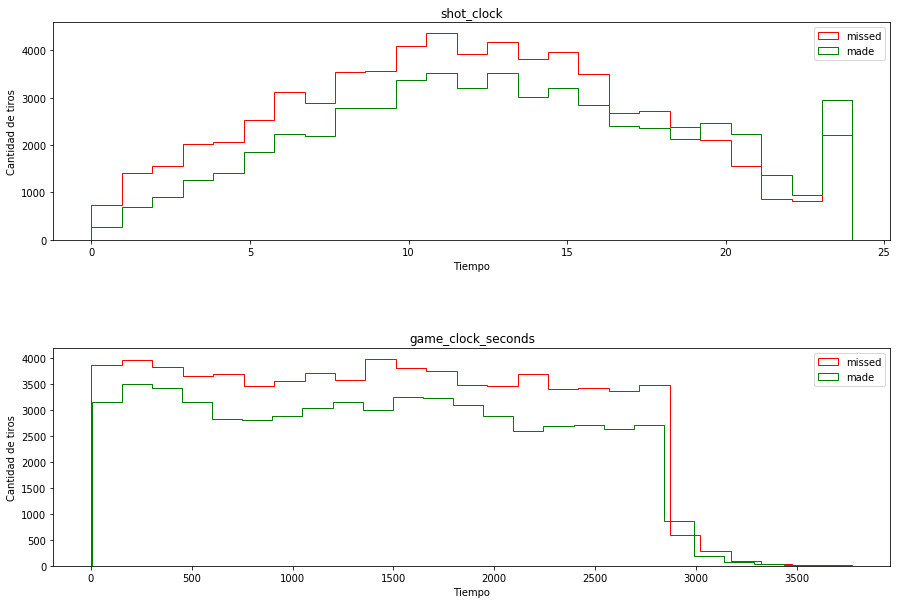

In [15]:
info_tiro = fulldata.groupby('shot_result_id')

variables = ['shot_clock', 'game_clock_seconds']

colores = {0:'r',1:'g'}

f, a = plt.subplots(2,1,figsize=(15,10))
f.subplots_adjust(hspace=0.50)

a = a.reshape(-1)

for i,ax in enumerate(a):
    for name,group in info_tiro:        
        group[variables[i]].plot(kind='hist',bins=25,histtype='step',
                             color=colores[name],
                             legend=True,
                             title=variables[i],
                             ax=ax,lw=1)
        ax.legend(['missed','made'])
        ax.set_ylabel('Cantidad de tiros')
        ax.set_xlabel('Tiempo')

En general vemos que el tiempo que transcurre no afecta en el porcentaje de eficacia de los tiradores. 
Sí se ve puntualmente entre los 20 y 24 segundos que marca el reloj de tiro que le eficiencia aumenta significativamente. 

Teniendo en cuenta los análisis anteriores que venimos desarrollando en este documento podemos decir que esto puede deberse a que:

* Al transcurrir poco tiempo de posesión antes del tiro, se debe a: 
  * Un contraataque rápido del equipo.
  * Un tiro de muy larga distancia.

A partir de la descomposición realizada con la variable shot_dist donde indica claramente que a mayor cercanía con el aro mayor efectividad en los lanzamientos, podemos concluir a priori que el aumento de la eficiencia entre los 20 y 24 segundos se debe a un contraataque rápido del equipo.

In [16]:
print("Promedio de distancia de tiro convertido con reloj > a 19 seg:", round(fulldata[np.logical_and((fulldata['shot_clock']>=19),(fulldata['shot_result_id'] == 1))].shot_dist.mean(), 2), "ft.")
print("Promedio de distancia de tiro errado con reloj > a 19 seg:", round(fulldata[np.logical_and((fulldata['shot_clock']>=19),(fulldata['shot_result_id'] == 0))].shot_dist.mean(),2), "ft.")

Promedio de distancia de tiro convertido con reloj > a 19 seg: 7.21 ft.
Promedio de distancia de tiro errado con reloj > a 19 seg: 11.51 ft.


Esos promedios respaldan nuestra teoría de que el aumento de eficacia se debe a la cercanía de tiro.

#### Por último vamos a analizar la diferencia entre mejores y peores respecto a la eficacia de los mismos.

##### player_name & player_id

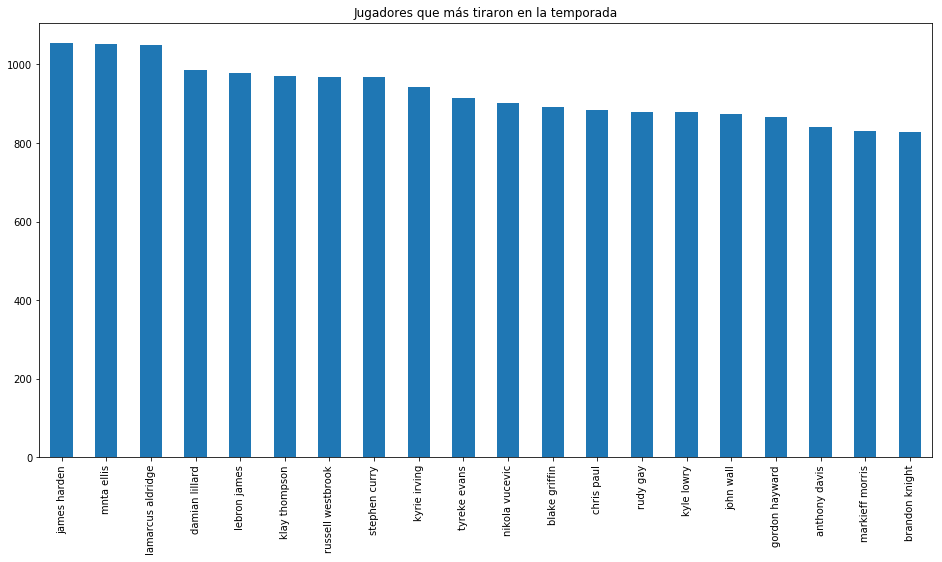

In [17]:
labels=['Nombre','Cantidad de tiros']
fulldata.player_name.value_counts().nlargest(20).plot.bar(figsize=(16,8), title="Jugadores que más tiraron en la temporada")

#### Los 20 jugadores con mayor eficacia de tiro

In [21]:
tiros_por_jugador = []
for i in fulldata.player_name.unique():
    tiros_nombre_cant_conv_ef = [i, fulldata[fulldata.player_name == i].player_name.size, fulldata[np.logical_and(fulldata['player_name']==i,fulldata['shot_result_id']==1 )].player_name.size,round((fulldata[np.logical_and(fulldata['player_name']==i,fulldata['shot_result_id']==1 )].player_name.size*100)/fulldata[fulldata.player_name == i].player_name.size,2),round(fulldata[fulldata['player_name']==i].shot_dist.mean(),2)]
    tiros_por_jugador.append(tiros_nombre_cant_conv_ef)
tiros_por_jugador.sort(key=lambda x: x[3],reverse=True)

headers = ['Nombre del jugador', 'Cantidad de tiros', 'Cantidad convertidos', 'Eficacia', 'Distancia de tiro media']
pd.DataFrame(tiros_por_jugador[0:21], columns=headers)

Nombre del jugador  Cantidad de tiros  Cantidad convertidos  Eficacia  \
0      deandre jordan                393                   280     71.25   
1      tyson chandler                340                   230     67.65   
2         rudy gobert                267                   167     62.55   
3          greg smith                 47                    29     61.70   
4       james johnson                311                   191     61.41   
5            ed davis                350                   211     60.29   
6       alexis ajinca                211                   126     59.72   
7       mason plumlee                403                   236     58.56   
8         john henson                241                   140     58.09   
9      chris andersen                136                    79     58.09   
10       amir johnson                402                   233     57.96   
11      dwight howard                334                   192     57.49   
12  jonas valanciunas                486                   274     56.38   
13    bismack biyombo                114                    64     56.14   
14       andrew bogut                239                   132     55.23   
15   amare stoudemire                336                   185     55.06   
16        aron baynes                257                   141     54.86   
17        steve adams                274                   150     54.74   
18       tyler zeller                419                   229     54.65   
19       andre miller                174                    95     54.60   
20      marcin gortat                570                   311     54.56   

    Distancia de tiro media  
0                      3.42  
1                      4.13  
2                      3.55  
3                      2.67  
4                      7.85  
5                      4.42  
6                      8.19  
7                      4.27  
8                      4.97  
9                      6.28  
10                     6.94  
11                     4.21  
12                     5.64  
13                     4.03  
14                     5.18  
15                     6.58  
16                     5.99  
17                     4.87  
18                     6.24  
19                     8.51  
20                     7.38

En esta lista se puede apreciar que los jugadores con más tiros no están dentro de los que tienen mejor eficacia. 
Pero si observamos la lista, la distancia media de tiro de los más "eficaces" es muy baja, esto quiere decir que la mayoría de sus tiros son muy cerca del aro y, como vimos anteriormente, a menor distancia más eficacia.

Vamos a ver la media de tiro de los jugadores que más tiraron:

In [22]:
eficacia_jugadores_con_mas_tiros = []
for i in fulldata.player_name.value_counts().nlargest(20).index:
    eficacia_por_jugador_con_mas_tiros = [i, fulldata[fulldata.player_name == i].player_name.size, fulldata[np.logical_and(fulldata['player_name']==i,fulldata['shot_result_id']==1 )].player_name.size,round((fulldata[np.logical_and(fulldata['player_name']==i,fulldata['shot_result_id']==1 )].player_name.size*100)/fulldata[fulldata.player_name == i].player_name.size,2),round(fulldata[fulldata['player_name']==i].shot_dist.mean(),2)]
    eficacia_jugadores_con_mas_tiros.append(eficacia_por_jugador_con_mas_tiros)
eficacia_jugadores_con_mas_tiros.sort(key=lambda x: x[3],reverse=True)

headers = ['Nombre del jugador', 'Cantidad de tiros', 'Cantidad convertidos', 'Eficacia', 'Distancia de tiro media']
pd.DataFrame(eficacia_jugadores_con_mas_tiros, columns=headers)

Nombre del jugador  Cantidad de tiros  Cantidad convertidos  Eficacia  \
0       anthony davis                841                   457     54.34   
1      nikola vucevic                902                   480     53.22   
2       blake griffin                893                   447     50.06   
3        lebron james                978                   478     48.88   
4       stephen curry                968                   470     48.55   
5          chris paul                885                   425     48.02   
6     markieff morris                830                   388     46.75   
7        kyrie irving                942                   439     46.60   
8       klay thompson                971                   449     46.24   
9   lamarcus aldridge               1050                   473     45.05   
10       james harden               1054                   474     44.97   
11         mnta ellis               1052                   473     44.96   
12     gordon hayward                867                   389     44.87   
13          john wall                874                   392     44.85   
14           rudy gay                879                   392     44.60   
15  russell westbrook                969                   422     43.55   
16       tyreke evans                914                   396     43.33   
17     damian lillard                986                   426     43.20   
18     brandon knight                828                   355     42.87   
19         kyle lowry                879                   364     41.41   

    Distancia de tiro media  
0                     10.41  
1                      9.47  
2                     11.82  
3                     14.01  
4                     17.47  
5                     16.62  
6                     12.71  
7                     14.23  
8                     16.79  
9                     13.62  
10                    14.85  
11                    14.45  
12                    14.72  
13                    14.33  
14                    13.05  
15                    12.73  
16                    10.07  
17                    16.34  
18                    16.40  
19                    15.98

Vemos que los jugadores con más tiros tienen una distancia media mucho más grande que aquellos con mejor eficacia. 

Con esto se puede apreciar claramente la importancia que tiene la distancia de tiro. 

### Para terminar de acomodar nuestro Dataset para el entrenamiento del modelo deberíamos realizar:
* Eliminar las variables que no vamos a utilizar:
  * pts
  * closest_defender_id
  * player_id
  * shot_result
  * game_id
  * game_result
  * final_margin
  * shot_clock
* Limpieza de valores nulos de la variable shot_clock, es el 4% del dataset aproximadamente (5567)

#### Luego de esta primer limpieza nos quedarían 122502 registros y 14 columnas.

* Limpieza de valores Outliers.
  * Valores negativos de touch_time.
  * shot_dist mayores a 40 ft.
  * closest_defender_dist mayores a 30 fr.
  
#### Luego de la eliminación de outliers nos quedarían 122152 registros y 14 columnas.

* Otras transformaciones necesarias:

  * A partir de las variables game_clock y period, pasar el tiempo de juego a segundos.
  * Transformar matchup a fecha, equipo local y equipo visitante.
  * Transformar los valores de location a 0 y 1.
  * Formateo correcto de los nombres.
  * Ordenar el dataset a partir de la fecha, de menor a mayor, para no entrenar con data futura. Considerando que tenemos un dataset con un tamaño importante podríamos utilizar set de train (60% con la información más antigua), test (20% con información con fecha mayor a train pero menor a validation) y validation (20% con información con fecha mayor a test).



* Por último deberíamos revisar si existen registros duplicados y en caso de que así sea eliminar los mismos.
  